In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
#%config InlineBackend.figure_format='retina'

1차원 root-finding 루틴으로 가장 유명한 것은 Newton's Method이다.
--
이는 Newton-Raphson method라고도 불림.
이 방법은 전의 방법과 달리, f(x)와 x에서 derivative f'(x) 가 존재해야 함.
 [*Newton's method*](https://en.wikipedia.org/wiki/Newton%27s_method)
 
<center><figure>
    <img src=https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Newton_iteration.svg/300px-Newton_iteration.svg.png>
    <figcaption>From Wikipedia (https://en.wikipedia.org/wiki/Newton%27s_method)</figcaption>
</figure></center>

Newton-Raphson 공식은 기하학적으로 $x_n$에서의 tangent line이 0을 지날때까지
그리고 y가 0이 되는 곳을 $x_{n+1}$
$$
x_{n + 1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$

대수적으로, 테일러 전개를 하면

$$
f(x + \delta) \approx
f(x) + f'(x)\delta + \frac{f''(x)}{2} \delta^2 + \cdots
$$

For small enough values of $\delta$, and for well-behaved functions, 선형을 넘어선 값은 중요하지 않게 된다, 

hence $f(x + \delta) = 0$ 함축한다 (이는 쉽게 $x + \delta$ = $x_{n+1}$이니 $f(x_{n+1})$ = 0이여야 하므로)

여기서 well-behaved 란?
순수 및 응용 수학(예: 최적화, 수치 통합, 수학 물리학) 모두에서 well- behaved 는 논의 중인 분석을 성공적으로 적용하는 데 필요한 가정을 위반하지 않는다는 것을 의미합니다.

관련 위키 https://en.wikipedia.org/wiki/Pathological_(mathematics)</figcaption>
</figure></center>

테일러 전개 관련 https://gosamy.tistory.com/111
</figcaption>
</figure></center>
$$
\delta = -\frac{f(x)}{f'(x)}
$$

The Newton-Rapshon method는 일차원에 국한하지만, 더 높은 차원으로 쉽게 일반화 된다.

# Pros and Cons
수렴할 때, 뉴턴의 방법은 빠르게 수렴하는 것이 장점이다.
그러나, 수렴이 꼭 보장되는 것은 아니며, 이분법과 달리(근을 포함 간격으로 시작하는 경우) 반드시 솔루션에 수렴되지 않는다.

예를들어, 예를 들어, 시험 추측이 국소 극단 근처에 있어서 첫 번째 미분 $f'(x)$가 거의 사라진다면, 뉴턴의 방법은 다음 추측을 실제 루트에서 멀리 보낸다.

뉴턴의 방법은 또한 function의 도함수 값을계산해야 하고, 이것은 도함수가 구하기가 힘들 경우 잠재적으로 단점이 된다.


Implementation

In [2]:
def newton_while(f_and_df, xinit, predicate):
    """Return the root calculated using Newton's method.
    :param f_and_df:
    이는 f와 f'을 포함하는 숫자 쌍을 return 하는 함수
    
    :param xinit:
        초기 추측 값
    
    :param prediate:
        여기서 predicate function는 세가지 인수를 취한다
        - i : 반복 횟수(iteration count)
        - xy: 중간 값의 한쌍과 현재 인수의 함수 값
        - dx: x값의 변화
    """
    
    x = xinit
    i = 0
    
    def newton_root():
        nonlocal i, x
        f, df = f_and_df(x)
        dx = -f / df #dx = 델타
        x_old = x #기존의 x는 old 에 저장
        x += dx #새로운 x에 저장 
        i += 1
        return i, (x_old, f) , dx
    
    while predicate(*newton_root()):
        pass #pass와 continue의 차이는 아래 참조
    
    
    return x

In [3]:
# continue
i = 0
while i < 10:
    i += 1
    if i % 2 == 0:
        continue
        print(3)
    print(i)
    
print('-'*10)

# pass 
i= 0
while i < 10:
    i += 1
    if i % 2 == 0:
        pass #pass는 이 줄만 지나가게 만드니, 그대로 1~10이 써진다.
        print(3) #3이 줄만 지나가니, 3은 써진다.
    print(i)
#언듯 보면 위 아래 둘다 홀수만 잘 출력 할 듯 하지만 아래의 구문은 모든 숫자를 출력한다.
#위에서 보았듯이 pass는 continue와 달리 해당 라인만 건너 지나가기 때문에 아래에 위치한 print 문이 매번 실행되기 때문이다.

1
3
5
7
9
----------
1
3
2
3
3
4
5
3
6
7
3
8
9
3
10


In [4]:
def predicate(i, xy, dx):
    print("i = {:1d}, x = {:.12f}, y = {:+.12e}, dx = {:+.12e}".format(i, *xy, dx))
    return abs(dx) > 1e-10 and i < 20

newton_while(lambda x: (x**3 - x**2 - 1, 3*x**2 - 2*x), 1, predicate)

i = 1, x = 1.000000000000, y = -1.000000000000e+00, dx = +1.000000000000e+00
i = 2, x = 2.000000000000, y = +3.000000000000e+00, dx = -3.750000000000e-01
i = 3, x = 1.625000000000, y = +6.503906250000e-01, dx = -1.392140468227e-01
i = 4, x = 1.485785953177, y = +7.240158956588e-02, dx = -1.983003344127e-02
i = 5, x = 1.465955919736, y = +1.351739844904e-03, dx = -3.845448288974e-04
i = 6, x = 1.465571374907, y = +5.024018974176e-07, dx = -1.430303039953e-07
i = 7, x = 1.465571231877, y = +6.927791673661e-14, dx = -1.972294349002e-14


1.465571231876768

Let's calculate the supergolden ratio.

### Divergent Example

앞서 경고한 대로, 뉴턴의 방식은 특정 경우엔 다르다. 예를 들어, 만약 ### Divergent $f(x) = x^{1/3}$.의 근의 접선이 수직일 경우

In [5]:
iterations = -1 
# iterations 의 용도는 한계를 알려주는 용도, 그냥 i에다가 20이상이라 해버리면 
# i는 변하고 있는 지역변수이기 때문에, 인식을 못함, 따라서 전역변수 취급한 다른 변수로
# i 값을 대신하여 세어 줘야 한다. 근데 아무 숫자여도 상관 x, 
# 이는 i로 계속해서 i와 같은 숫자가 입력되고 있기 때문이다.

def predicate(i, xy, dx):
    global iterations
    iterations = i
    print("\ti = {}, xy = {}, dx = {}".format(i, xy, dx))
    return abs(dx) > 1e-10 and i < 20

solution = newton_while(lambda x : (x**(1/3), 
                                    (1/3) * x **(-2/3)), 
                        0.1, predicate)

if iterations >= 20:
    print(f"\n!! Exeeded maximum iterations (={20}) befor convergence !!")
    
print(solution)

	i = 1, xy = (0.1, 0.4641588833612779), dx = -0.30000000000000004
	i = 2, xy = (-0.20000000000000004, (0.2924017738212867+0.5064547284817317j)), dx = (0.6000000000000002-1.9729319640436202e-16j)
	i = 3, xy = ((0.40000000000000013-1.9729319640436202e-16j), (0.7368062997280774-1.2113905833685232e-16j)), dx = (-1.2000000000000006+5.918795892130862e-16j)
	i = 4, xy = ((-0.8000000000000005+3.945863928087242e-16j), (0.4641588833612783+0.8039467687661697j)), dx = (2.4000000000000017-2.610025437084443e-15j)
	i = 5, xy = ((1.6000000000000012-2.215439044275719e-15j), (1.1696070952851467-5.398319219492965e-16j)), dx = (-4.800000000000003+6.646317132827156e-15j)
	i = 6, xy = ((-3.200000000000002+4.430878088551437e-15j), (0.7368062997280782+1.2761859464658523j)), dx = (9.600000000000005-1.7538271941033372e-14j)
	i = 7, xy = ((6.400000000000003-1.3107393852481934e-14j), (1.8566355334451117-1.2674819363217689e-15j)), dx = (-19.200000000000006+3.9322181557445796e-14j)
	i = 8, xy = ((-12.80000000000000

In [6]:
def predicate(i, xy, dx):
    print("\ti = {}, xy = {}, dx = {}".format(i, xy, dx))
    return abs(dx) > 1e-10 and i < 20

solution = newton_while(lambda x : (x**(1/3), 
                                    (1/3) * x **(-2/3)), 
                        0.1, predicate)

if iteration >= 20:
    print(f"\n!! Exeeded maximum iterations (={20}) befor convergence !!")
    
print(solution) 

	i = 1, xy = (0.1, 0.4641588833612779), dx = -0.30000000000000004
	i = 2, xy = (-0.20000000000000004, (0.2924017738212867+0.5064547284817317j)), dx = (0.6000000000000002-1.9729319640436202e-16j)
	i = 3, xy = ((0.40000000000000013-1.9729319640436202e-16j), (0.7368062997280774-1.2113905833685232e-16j)), dx = (-1.2000000000000006+5.918795892130862e-16j)
	i = 4, xy = ((-0.8000000000000005+3.945863928087242e-16j), (0.4641588833612783+0.8039467687661697j)), dx = (2.4000000000000017-2.610025437084443e-15j)
	i = 5, xy = ((1.6000000000000012-2.215439044275719e-15j), (1.1696070952851467-5.398319219492965e-16j)), dx = (-4.800000000000003+6.646317132827156e-15j)
	i = 6, xy = ((-3.200000000000002+4.430878088551437e-15j), (0.7368062997280782+1.2761859464658523j)), dx = (9.600000000000005-1.7538271941033372e-14j)
	i = 7, xy = ((6.400000000000003-1.3107393852481934e-14j), (1.8566355334451117-1.2674819363217689e-15j)), dx = (-19.200000000000006+3.9322181557445796e-14j)
	i = 8, xy = ((-12.80000000000000

NameError: name 'iteration' is not defined

In [ ]:
iterations = -1
def predicate(i, xy, dx):
    global iterations
    iterations = i
    print("\ti = {}, xy = {}, dx = {}".format(i, xy, dx))
    return abs(dx) > 1e-10 and i < 1027 #i가 1028부턴 오류가 발생

solution = newton_while(lambda x : (x**(1/3), 
                                    (1/3) * x **(-2/3)), 
                        0.1, predicate)

if iterations >= 1027:
    print(f"\n!! Exeeded maximum iterations (={1027}) befor convergence !!")
    
print(solution) 

기존의 방식이라면 이렇게 됨 #이래서 안되는 건가??

In [ ]:
def predicate(i, xy, dx):
    print("\ti = {}, xy = {}, dx = {}".format(i, xy, dx))
    return abs(dx) > 1e-10 and i < 1028

solution = newton_while(lambda x : (x**(1/3), 
                                    (1/3) * x **(-2/3)), 
                        0.1, predicate)

print(solution) 


### CubeRoot

Approximate $\sqrt[3]{2}$ by solving

$$
x^3 - 2 = 0
$$

In [ ]:
cuberoot2_approx = newton_while(lambda x: (x**3 - 2, 3*x*x), 1, 
                               lambda i , xy, dx: abs(dx) > 1e-10)
cuberoot2_approx, abs(2**(1/3) - cuberoot2_approx)

### Whistler Dispersion Relation

Calculate the whistler dispersion relation we did previously, now using Newton's method.

We have defined

$$
f_k(\omega) = 
c^2 k^2 - \omega^2 + \frac{\omega_p^2}{1 - \omega_c/\omega}
$$

Its derivative is

$$
f_k'(\omega) = 
-2\omega - \omega_p^2\frac{\omega_c}{(\omega - \omega_c)^2}
$$

In [ ]:
# f_k(w) 와 f_k'k(w) 를 고정하자.
def f_and_df(k,w):
    c, wp, wc = 5, 5, 1
    f = c**2 * k**2 - w**2 + wp**2 / (1 - wc/w)
    df = -2*w - wp**2 * wc/(w-wc)**2
    return f, df

# k가 주어지면 관계를 풀 함수를 정의하자.
def single_step(k,winit):
    return newton_while(lambda w: f_and_df(k, w), winit,
                       lambda i, wf, dw: abs(dw) > 1e-7 * abs(max(wf[0], winit, key = abs)))

# k 구간을 결정하자.
ks = np.linspace(0.01, 10, 40)

# omega의 초기 trial guess
ws = [ks[0]]

# k를 따라서 solution을 찾아보자
for k in ks:
    ws.append(single_step(k, ws[-1]))
    
# 정해진 구간에서 구해진 첫 k_0 에 대한 k_1, k_2 .... 값을  ws에 추가한다

# remove the first guess
ws = ws[1:]


w_exact = np.linspace(1e-10, 0.99, 400)
k_exact = 1/5 * np.sqrt(w_exact**2 - 5**2/(1 - 1/w_exact))
# 실제 해를 적어둔 것. 구간 내 w 값이 정해 졌을때, 그 값에 대한  k(w) 값을 구한 것.
# 그림이 약간 헷갈릴 수 있다. 이는 pass때문에 그런 것인데, 최종적으로 해만 튀어나오게 만든 것이
# newton's solution 함수이다. 그렇기에, 실제 해와 맞아 떨어진 것을 볼 수 있는데,
# 이는 제약 조건이 매우 작기 때문에 그 값을 만족할 정도면 실제 값과 맞아 떨어짐을 볼 수 있다.


plt.figure()
plt.plot(k_exact, w_exact, "-k", label = "$\\omega$ exact")
plt.plot(ks, ws, ".:r", linewidth = 1, label = "$\\omega$ approx")
plt.xlabel("$k$")
plt.ylabel("$\\omega$")
plt.legend()
plt.show()


In [ ]:
ws

In [ ]:
print(ks[0])

# Fractals

In mathmatics, Fractal is a term used to describe geometric shapes containing detailed structure at arbitrarily small scales
:뉴턴의 방법은 complex-valued fumctions and solutions 에도 사용된다. 
임의이 작은 규모의 구조를 상세히 포함하는 기하학적 모양을 묘사하는데 사용되는 용어이다.


$$
z^3 - 1 = 0
$$

real, imaginary 축으로 
가설이 진짜 해로 이어진 지역을 검은색으로
그렇지 않으면 흰색으로 



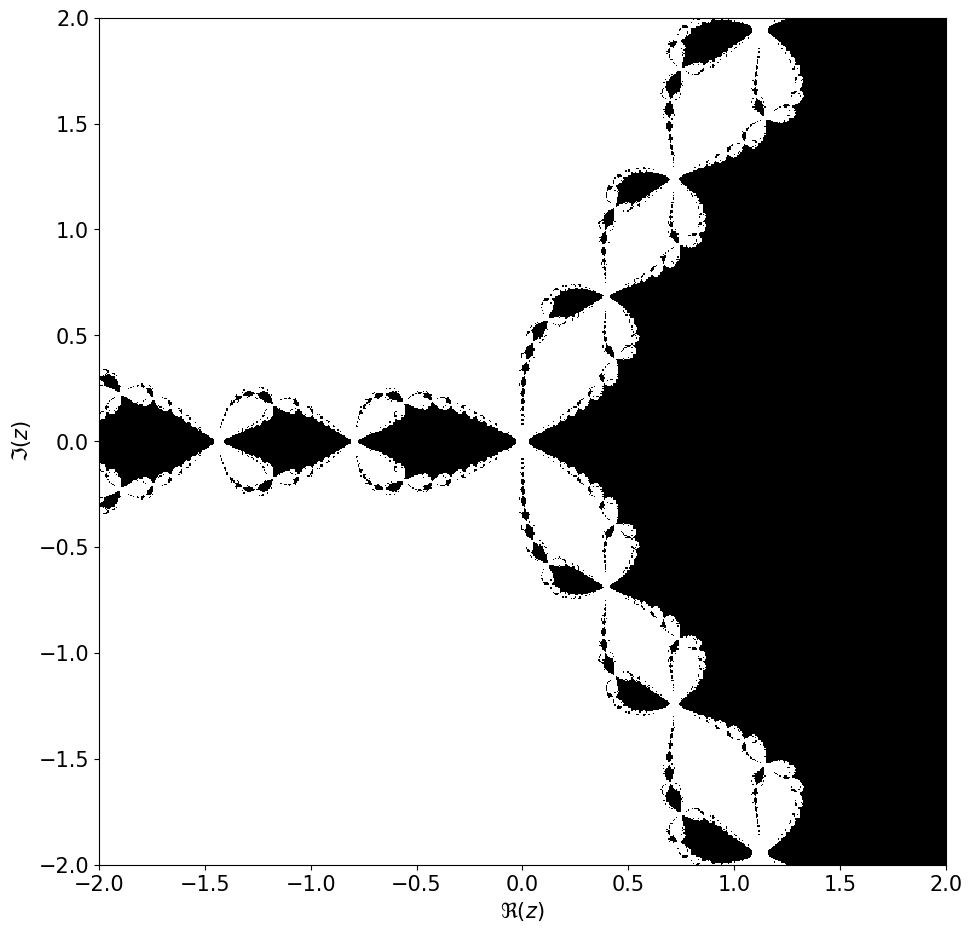

In [7]:
def found_real_root(zinit: complex) -> int:
    root = newton_while(lambda z: (z**3 - 1, 3*z**2), zinit,
                       lambda i, xy, dx: abs(dx) > 1e-10 and i < 20)
    x, y = root.real, root.imag
    if abs(y) > 1e-10 or abs(x - 1) > 1e-10:
        return 0
    # 이 부분이 해가 아닌 부분이라고 볼 수 있겠지.
    return 1
    # 이 부분이 해 라고 볼 수 있겠지.
    
xs = np.linspace(-2, 2, 700) # 충분한 범위
ys = xs #변수를 일단 ys에 저장

mask = [[found_real_root(complex(x, y)) for x in xs] for y in ys]
# complex에서 범위에 따라 0 또는 1을 보내게 되는데 (이는 found_real_root 로)
# 이때, 똑같은 값을 실수와 complex된 y로 보내어 대칭적인 그림을 만든다???
# complex든 real이든 일단 범위는 넘어가면 색이 칠해지게 된다.  (found_real_root 함수로 인하여)
# 그러면 일단은 대칭성을 가지겠지. 왜냐면 real이든 imaginary든 abs값은 결국 한계를 넘으면 검은색일테니까
# 이때, 


plt.figure(figsize = (11, 11)) # 사이즈 정해주고

plt.imshow(mask, interpolation = 'none', origin = 'lower',
          cmap = 'Greys', extent = np.hstack((xs[[0, -1]], ys[[0, -1]])))
plt.xlabel('$\\Re(z)$')
plt.ylabel('$\\Im(z)$')
plt.show()

In [ ]:
print(mask)

In [ ]:
print(ys)

In [ ]:
def greeting(name: str) -> str:
    return 'Hello ' + name

In [ ]:
greeting('kang')

In [ ]:
def greeting(name: str) -> str:
    s: str = 'Hello ' + name
    return s

In [ ]:
greeting('kang')

 인수의 타입 힌트를 붙이고, 괄호 뒤 콜론 전에 "-> 타입" 을 붙이는 형식으로 반환값에 대한 타입 힌트를 지정할 수 있다.

In [ ]:
def make_post(title: str, author_id: int=0) -> str:
    num: int = 34  # int type
    str: string = "Hello types!"  # str type
    test: Test = Test(num)  # class "Test" type
    #다양하게 변수에 대한 힌트를 이렇게 담을 수 있는 것을 보여주는 예시들이다.

Let's zoom in the region $\Re(z) \in [-0.5, 0.5]$ and $\Im(z) \in [-0.5, 0.5]$.

In [ ]:
xs = np.linspace(-.5, .5, 700)
ys = xs
mask = [[found_real_root(complex(x, y)) for x in xs] for y in ys]

#위와 똑같이 그림을 그려준다.
plt.figure(figsize=(11, 11))
plt.imshow(mask, interpolation='none', origin='lower', cmap='Greys',
            extent=np.hstack((xs[[0, -100]], ys[[0, -100]])))


plt.xlabel('$\\Re(z)$')
plt.ylabel('$\\Im(z)$')
plt.show()

## interpolation : 보간법, 픽셀들의 축 위치 간격을 보정하여 이미지가 자연스러운
모양으로 보일 수 있게 한다. imshow() 에는 16가지 보간법이 있고, 'nearest'는 갖아
고해상도 보간법.

## orgin :
#### lower
- [0, 0]은 (왼쪽, 아래)
- [M', 0]은 (왼쪽, 상단)
- [0, N']는 (오른쪽, 아래)
- [M', N']은 (오른쪽, 상단)

#### upper
- [0, 0]은 (왼쪽, 상단)
- [M', 0]은 (왼쪽, 아래)
- [0, N']는 (오른쪽, 상단)
- [M', N']은 (오른쪽, 아래)




## cmap = '' -> 원하는 색깔, 칼라맵은 다음 참조
https://matplotlib.org/tutorials/colors/colormaps.html
</figcaption>
</figure></center>

## extent
#### 전에 먼저 hstack
numpy.hstack(tup, *, dtype=None, casting='same_kind')
- 배열을 수평으로 배열을 배열로 쌓으세요 
a = np.array((1,2,3))
>>> b = np.array((4,5,6))
>>> np.hstack((a,b))
array([1, 2, 3, 4, 5, 6])

>>> a = np.array([[1],[2],[3]])
>>> b = np.array([[4],[5],[6]])
>>> np.hstack((a,b))
array([[1, 4],
       [2, 5],
       [3, 6]])
       
### extent
현재 축의 좌표에서 이미지를 붙여넣을 직사각형의 모서리를 지정하십시오.

범위는 왼쪽과 오른쪽 한계와 하단과 상단 한계를 정의한다. 다음과 같은 네 가지 값이 필요합니다: 
>>extent =[horizontal_min,horizontal_max,vertical_min,vertical_max].

그러니 4가지 값이 필요하니까 extent=np.hstack((xs[[0, -100]], ys[[0, -100]]))) 이러면 4가지 값이지. 




In [ ]:
extent=np.hstack((xs[[0, -1]], ys[[0, -1]]))
extent

#즉, grid의 한계를 정한다.